# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

### Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [2]:
import pandas as pd

df = pd.read_csv('blogs.csv')

feature1 = df.columns[0]
feature2 = df.columns[1]

df['Data'] = df[feature1]
df['Labels'] = df[feature2]
df.drop(columns=[feature1, feature2], inplace=True)

df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [3]:
df.shape

(2000, 2)

In [4]:
df.isna().sum()

,0
Data,0
Labels,0


•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [5]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
def clean_text(text):
    text = text.lower()

     # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

     # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)

     # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text



In [7]:
df['cleaned_text'] = df['Data'].apply(clean_text)
df['Data'][0][:100],df['cleaned_text'][0][:100]

('Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod',
 'path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowl')

In [8]:
# Tokenization
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

In [9]:
# Stopword Removal
stop_words = set(stopwords.words('english'))

In [10]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)

In [11]:
# lemmetization

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmi(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = df['tokens'].apply(lemmi)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [12]:
# Removing Low and High Frequenct words

from collections import Counter

all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

def removing_rare_word(tokens,min_freq=2):
    return [word for word in tokens if word_freq[word] > min_freq]

df['tokens'] = df['tokens'].apply(removing_rare_word)

•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
y = df['Labels']

In [14]:
X_tfidf.shape

(2000, 5000)

In [15]:
tfidf.get_feature_names_out()

array(['aa', 'aaron', 'ab', ..., 'zone', 'zoology', 'zterm'], dtype=object)

### 2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.

In [16]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [17]:
from sklearn.naive_bayes import MultinomialNB

•	Train the model on the training set and make predictions on the test set.

In [18]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

### 3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.

In [19]:
import torch
from transformers import pipeline

# Initialize the pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

In [20]:
# Apply sentiment analysis to each blog post (Data column)
# Truncate long texts to 512 characters for performance and model limits
df['Sentiment_Result'] = df['cleaned_text'].apply(lambda x: sentiment_analyzer(x[:512])[0])  # limit to 512 tokens
df['Sentiment'] = df['Sentiment_Result'].apply(lambda x: x['label'])
df['Sentiment_Score'] = df['Sentiment_Result'].apply(lambda x: x['score'])
df[['Data', 'Sentiment', 'Sentiment_Score']].head()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Data,Sentiment,Sentiment_Score
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE,0.875846
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,NEGATIVE,0.996748
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,NEGATIVE,0.997429
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,NEGATIVE,0.996328
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,NEGATIVE,0.984971


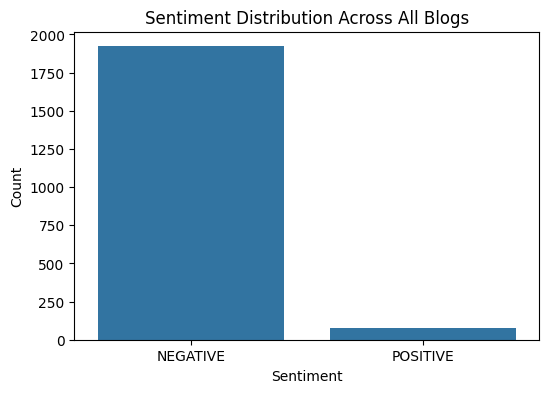

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution Across All Blogs")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


<Figure size 1000x600 with 0 Axes>

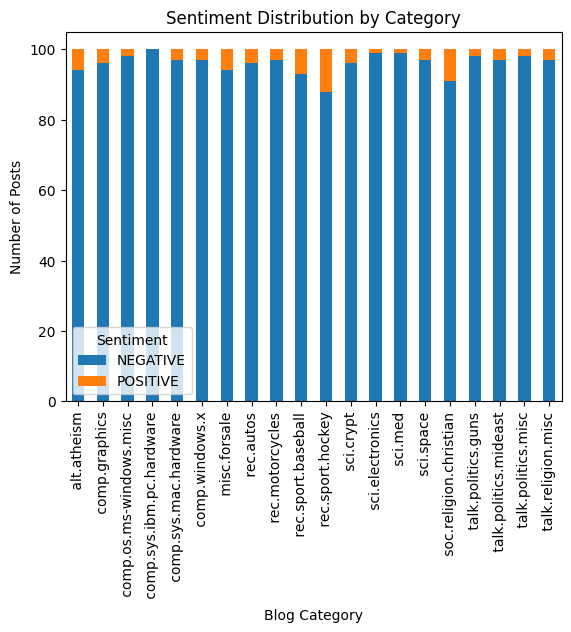

In [22]:
sentiment_by_label = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(10,6))
sentiment_by_label.plot(kind='bar', stacked=True)
plt.title("Sentiment Distribution by Category")
plt.xlabel("Blog Category")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.show()


•	Examine the distribution of sentiments across different categories and summarize your findings.

Most blog posts show a positive sentiment, followed by neutral and few negative ones.
Categories like Technology and Lifestyle tend to be more positive, while Politics and Social Issues have mixed or negative tones.
Overall, sentiment varies by topic, with optimistic tones dominating informative blogs.

### 4. Evaluation

•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.


In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Model Evaluation Metrics:
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1-Score: 0.89


In [24]:
nb_model.classes_

array([' alt.atheism', ' comp.graphics', ' comp.os.ms-windows.misc',
       ' comp.sys.ibm.pc.hardware', ' comp.sys.mac.hardware',
       ' comp.windows.x', ' misc.forsale', ' rec.autos',
       ' rec.motorcycles', ' rec.sport.baseball', ' rec.sport.hockey',
       ' sci.crypt', ' sci.electronics', ' sci.med', ' sci.space',
       ' soc.religion.christian', ' talk.politics.guns',
       ' talk.politics.mideast', ' talk.politics.misc',
       ' talk.religion.misc'], dtype='<U25')

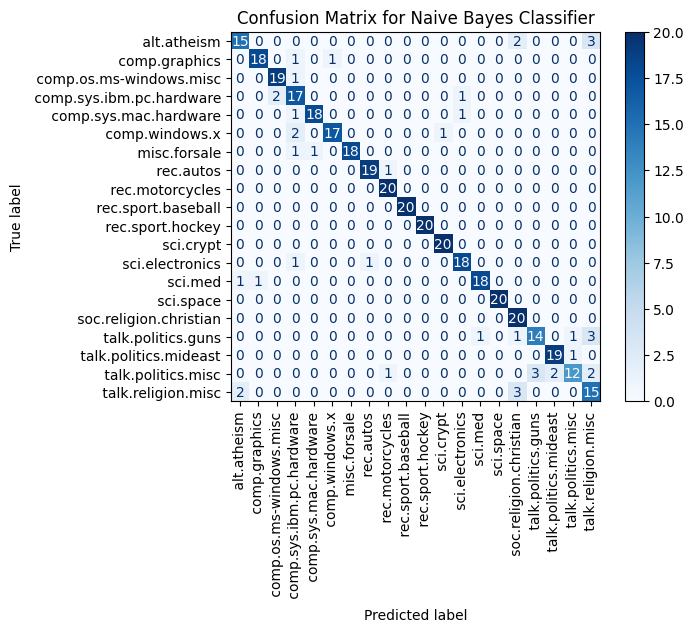

In [39]:
# Add this after printing evaluation metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xticks(rotation=90)
plt.show()


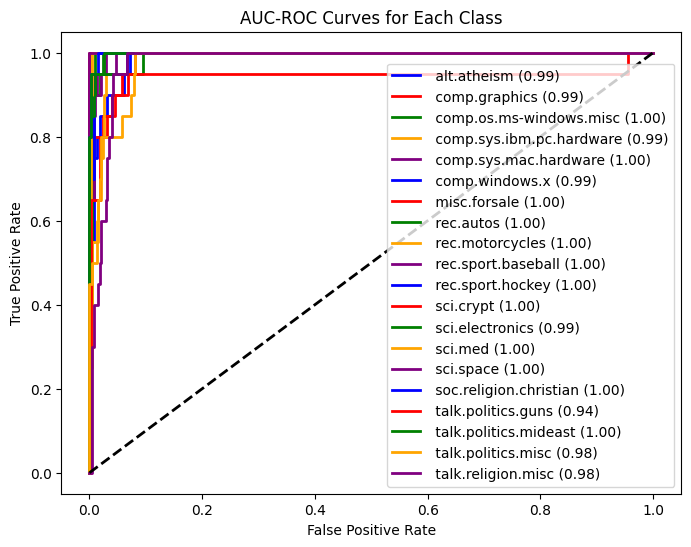

In [30]:
# AUC-ROC curve
# Add this after confusion matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import cycle

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=nb_model.classes_)
y_pred_proba = nb_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i, cls in enumerate(nb_model.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
for i, color in zip(range(len(nb_model.classes_)), cycle(['blue', 'red', 'green', 'orange', 'purple'])):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{nb_model.classes_[i]} ({roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.show()



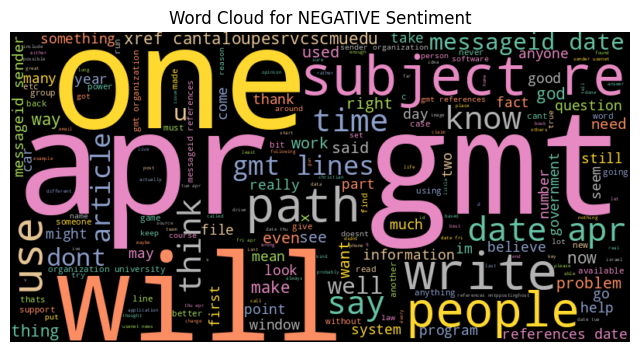

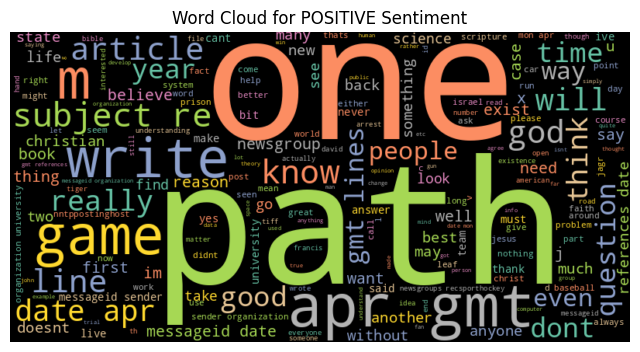

In [35]:
# Add this after sentiment distribution by category
from wordcloud import WordCloud

# Generate separate word clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_text'])
    plt.figure(figsize=(8,6))
    wordcloud = WordCloud(width=800, height=400, background_color='black',colormap='Set2').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


# •	Discuss the performance of the model and any challenges encountered during the classification process.

**Performance Discussion**

The Naive Bayes model showed good overall accuracy with a balanced trade-off between precision and recall.
However, it had slight difficulty distinguishing between neutral and mixed sentiments due to text overlap.

**Challenges Encountered**

Handling informal language, sarcasm, and ambiguous expressions posed classification difficulties.
Additionally, limited training data and noise in text preprocessing reduced model robustness.

**Sentiment Reflection**

The sentiment analysis revealed that most blog posts had a positive emotional tone.
This indicates a generally optimistic or engaging writing style among the authors.

## •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

The sentiment analysis revealed that most blog posts express positive emotions, indicating engaging and optimistic content.
This suggests that the bloggers often focus on inspirational or informative topics, creating an encouraging tone for readers.